In [1]:
!pip install skorch xtal2png matbench

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from matbench.bench import MatbenchBenchmark

mb = MatbenchBenchmark(autoload=False, subset=["matbench_mp_e_form"])

2022-06-23 02:27:16 INFO     Initialized benchmark 'matbench_v0.1' with 1 tasks: 
['matbench_mp_e_form']


In [23]:
for task in mb.tasks:
    task.load()

2022-06-23 02:27:18 INFO     Loading dataset 'matbench_mp_e_form'...
Fetching matbench_mp_e_form.json.gz from https://ml.materialsproject.org/projects/matbench_mp_e_form.json.gz to /usr/local/lib/python3.7/dist-packages/matminer/datasets/matbench_mp_e_form.json.gz


Fetching https://ml.materialsproject.org/projects/matbench_mp_e_form.json.gz in MB: 166.735872MB [00:00, 583.75MB/s]                                        


2022-06-23 02:30:47 INFO     Dataset 'matbench_mp_e_form loaded.


In [24]:
# prototype on a single fold for now
X_train, y_train = task.get_train_and_val_data(0)

In [25]:
# keep structures with num_sites <= 52
site_counter = lambda x: x.num_sites
idx = X_train.apply(site_counter) <= 52
X_train = X_train[idx]
y_train = y_train[idx]

In [35]:
X_train.index[558]

'mb-mp-e-form-000702'

In [26]:
# seems to get through the whole thing without issue once??
data = xc.xtal2png(X_train)

  1%|          | 558/90001 [00:02<07:57, 187.43it/s]


ValueError: ignored

In [36]:
X_train[558].num_sites

15

In [37]:
X_train[558]

Structure Summary
Lattice
    abc : 5.54916178772272 5.54916178772272 5.54916178772272
 angles : 60.00000000000001 60.00000000000001 60.00000000000001
 volume : 120.82788211276184
      A : -3.92384993 -3.92384993 -0.0
      B : -3.92384993 0.0 -3.92384993
      C : 0.0 -3.92384993 -3.92384993
PeriodicSite: Ni (0.0000, 0.0000, 0.0000) [-0.0000, -0.0000, 0.0000]
PeriodicSite: N (-3.9238, -5.9735, -3.9238) [0.7612, 0.2388, 0.7612]
PeriodicSite: N (-3.9238, -1.8742, -3.9238) [0.2388, 0.7612, 0.2388]
PeriodicSite: N (-3.9238, -3.9238, -5.9735) [0.2388, 0.7612, 0.7612]
PeriodicSite: N (-3.9238, -3.9238, -1.8742) [0.7612, 0.2388, 0.2388]
PeriodicSite: N (-5.9735, -3.9238, -3.9238) [0.7612, 0.7612, 0.2388]
PeriodicSite: N (-1.8742, -3.9238, -3.9238) [0.2388, 0.2388, 0.7612]
PeriodicSite: N (-1.9619, -1.9619, -1.9619) [0.2500, 0.2500, 0.2500]
PeriodicSite: N (-5.8858, -5.8858, -5.8858) [0.7500, 0.7500, 0.7500]
PeriodicSite: O (0.0000, -1.9619, -1.9619) [-0.0000, -0.0000, 0.5000]
PeriodicSite: 

In [39]:
xc.xtal2png([X_train[558]])

  0%|          | 0/1 [00:00<?, ?it/s]


ValueError: ignored

From earlier, this converts structures 1 by 1 to avoid memory overflow. Fixed in 0.6.2

In [27]:
from xtal2png.core import XtalConverter
import torchvision.transforms.functional as TF

# For large datasets, xtal2png onto entire X_train Series leads to memory error
# Convert Structure objects to Image individually, then to Tensor
# Note that xtal2png works only on sequences of Structure objects
xc = XtalConverter()
struct2tensor = lambda x: TF.to_tensor(xc.xtal2png([x])[0])
X_train1 = X_train.apply(struct2tensor)  # 17 min

100%|██████████| 1/1 [00:00<00:00, 373.46it/s]
/usr/local/lib/python3.7/dist-packages/xtal2png/core.py:267: UserWarning: lower RGB value(s) OOB (-4 less than 0). thresholding to 0.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)
  f"lower RGB value(s) OOB ({mn} less than 0). thresholding to 0.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)"  # noqa: E501
100%|██████████| 1/1 [00:00<00:00, 221.18it/s]
/usr/local/lib/python3.7/dist-packages/xtal2png/core.py:267: UserWarning: lower RGB value(s) OOB (-9 less than 0). thresholding to 0.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)
  f"lower RGB value(s) OOB ({mn} less than 0). thresholding to 0.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)"  # noqa: E501
100%|██████████| 1/1 [00:00<00:00, 133.86it/s]
/usr/local/lib/python3.7/dist-packages/xtal2png/core.py:267: UserWarning:

ValueError: ignored

In [ ]:
import numpy as np

# calculate shape of convolution output
W = 15
K = 3
P = 0
S = 2
np.floor((W - K + 2 * P) / S) + 1

7.0

In [ ]:
# TODO: normalize images with mean and std

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
"""Modified from https://skorch.readthedocs.io/en/stable/user/quickstart.html"""
from skorch.regressor import NeuralNetRegressor
import numpy as np
from torch import nn
import torch
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error
from skorch.callbacks import EarlyStopping


# TODO: batchnorm
class CNNRegressor(nn.Module):
    def __init__(self, dropout: float = 0.2) -> None:
        super().__init__()
        self.convolutions = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),     # (64, 64, 1) --> (64, 64, 16)
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),          # (31, 31, 16)
            nn.Conv2d(16, 32, kernel_size=3, padding=1),    # (31, 31, 32)
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),          # (15, 15, 32)
            nn.Conv2d(32, 64, kernel_size=3, padding=1),    # (15, 15, 64)
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),          # (7, 7, 64)
        )
        self.fullyconnected = nn.Sequential(
            # nn.Dropout(p=dropout),
            nn.LayerNorm(7 * 7 * 64),
            nn.Linear(7 * 7 * 64, 1024),
            nn.LeakyReLU(inplace=True),
            # nn.Dropout(p=dropout),
            nn.Linear(1024, 256),
            nn.LeakyReLU(inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.convolutions(x)
        x = torch.flatten(x, 1)  # flatten all but batch dim
        x = self.fullyconnected(x)
        return x


net = NeuralNetRegressor(
    CNNRegressor,
    criterion=nn.MSELoss,
    max_epochs=100,
    optimizer=optim.AdamW,
    optimizer__amsgrad=True,
    optimizer__lr=.001,
    # callbacks=[EarlyStopping()],
    device="cuda" if torch.cuda.is_available() else "cpu",
    batch_size=64,
)

# y must be certain shape and dtype for skorch
y_train = (y_train.values).astype(np.float32).reshape(-1, 1)

net.fit(X_train.values, y_train)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.0347       17.8351  9.2785
      2        0.0373       15.3665  9.2550
      3        0.0189       14.4783  9.2199
      4        0.0271       19.6320  9.2276
      5        0.0408       16.9799  9.2339
      6        0.0333       19.3681  9.2379
      7        0.0348       18.8601  9.2226
      8        0.0365       18.3597  9.2177
      9        0.0332       18.6455  9.2561
     10        0.0325       15.4336  9.2431
     11        0.1369       15.6468  9.5242
     12        0.0318       16.1299  9.2744
     13        0.0397       19.2752  9.2540
     14        0.0387       16.0720  9.2491
     15        0.0346       19.3728  9.5737
     16        0.0347       18.7316  9.2814
     17        0.0451       15.7453  9.2333
     18        0.0381       17.5939  9.2344
     19        0.0443       18.9311  9.2361
     20        0.0349       19.1727  9.2465
     21        0.0333       19.2

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=CNNRegressor(
    (convolutions): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01, inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LeakyReLU(negative_slope=0.01, inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): LeakyReLU(negative_slope=0.01, inplace=True)
      (8): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (fullyconnected): Sequential(
      (0): LayerNorm((3136,), eps=1e-05, elementwise_affine=True)
      (1): Linear(in_features=3136, out_features=1024, bias=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)


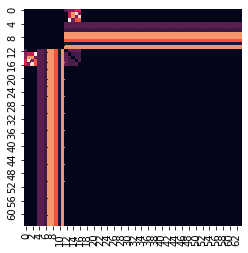

In [ ]:
import numpy as np
import seaborn as sns

sns.heatmap(T.ToTensor()(first_struct[0]).reshape((64, 64)), square=True, cbar=False);

In [ ]:
from xtal2png.core import XtalConverter

xc = XtalConverter(save_dir="data")
data = xc.xtal2png(X_train, save=True)

/usr/local/lib/python3.7/dist-packages/xtal2png/core.py:197: UserWarning: lower RGB value(s) OOB (-14 less than 0). thresholding to 0.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)
  f"lower RGB value(s) OOB ({mn} less than 0). thresholding to 0.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)"  # noqa: E501
/usr/local/lib/python3.7/dist-packages/xtal2png/core.py:203: UserWarning: upper RGB value(s) OOB (532 greater than 255). thresholding to 255.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)
  f"upper RGB value(s) OOB ({mx} greater than 255). thresholding to 255.. may throw off crystal structure parameters (e.g. if lattice parameters are thresholded)"  # noqa: E501


In [ ]:
type(data[0])

PIL.Image.Image

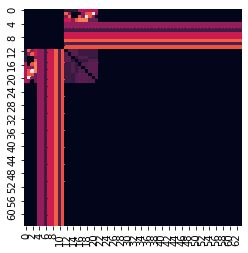

In [ ]:
import numpy as np
import seaborn as sns

sns.heatmap(np.asarray(data[1000]), square=True, cbar=False);

In [ ]:
# site_count = lambda x: x.num_sites
# # max num_sites in X_train
# X_train.map(site_count).max()

In [ ]:
# # how many Structures have num_sites > 52
# 100 - (X_train.map(site_count) > 52).sum() / len(X_train) * 100

In [ ]:
# # problematic structures
# idx = X_train.map(site_count) > 52
# bad = X_train.loc[idx]
# bad

https://github.com/sparks-baird/xtal2png/issues/65

In [ ]:
# from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
# from tqdm import tqdm


# # problematic structures
# idx = X_train.map(site_count) > 52
# structures = X_train.loc[idx]

# new_structures = []
# for structure in tqdm(structures):
#     spa = SpacegroupAnalyzer(structure, symprec=0.1)
#     new_structure = spa.find_primitive()
#     new_structures.append(new_structure)

# # how many num_sites > 52 still
# print(sum([struct.num_sites > 52 for struct in new_structures]))

# # merge_sites method is in-place
# for structure in tqdm(structures):
#     structure.merge_sites(tol=0.1, mode="average") # "delete" mode probably OK too, default tol is 0.01 might be OK
# print(sum([struct.num_sites > 52 for struct in structures]))